In [94]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
#
URL = 'https://countrymusichalloffame.org/hall-of-fame/members/'
page = requests.get(URL)
page.content

b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' />\n<link rel="profile" href="https://gmpg.org/xfn/11" />\n<link rel="pingback" href="https://countrymusichalloffame.org/wp/xmlrpc.php" />\n<!--[if lt IE 9]>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-them

In [78]:
#add Beautiful Soup
soup = BeautifulSoup(page.content, 'lxml')

In [79]:
#h3 is the tag for names of inductees
artists = soup.find_all('h3')
artists

[<h3>Roy Acuff</h3>,
 <h3>Alabama</h3>,
 <h3>Bill Anderson</h3>,
 <h3>Eddy Arnold</h3>,
 <h3>Chet Atkins</h3>,
 <h3>Gene Autry</h3>,
 <h3>DeFord Bailey</h3>,
 <h3>Bobby Bare</h3>,
 <h3>Johnny Bond</h3>]

In [80]:
#this is BS version of a list
type(artists)

#I TRIED TO CAST AS STR, READ_HTML, BUT IT SAYS NO TABLE. WHY??

bs4.element.ResultSet

In [81]:
#Create a for loop to extract artists' names. .text works, but not sure exactly what it belongs to.
artist_names = []

for artist in artists:
    #print(artist.text)
    artist_names.append(artist.text)

artist_names

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Johnny Bond']

In [82]:
#Find the years inducted. There are multiple 'p' tags, so filter for years inducted. IS THERE A NON REGEX WAY TO DO THIS??
artists_inducted = soup.find_all('p', string=re.compile('Inducted'))                       #(r'\d\d\d\d'))
artists_inducted

[<p>
                     Inducted 1962                  </p>,
 <p>
                     Inducted 2005                  </p>,
 <p>
                     Inducted 2001                  </p>,
 <p>
                     Inducted 1966                  </p>,
 <p>
                     Inducted 1973                  </p>,
 <p>
                     Inducted 1969                  </p>,
 <p>
                     Inducted 2005                  </p>,
 <p>
                     Inducted 2013                  </p>,
 <p>
                     Inducted 1999                  </p>]

In [83]:
#How to find years without regex:

# artists_inducted = soup.find_all(class_="vertical-card_content--copy")
# artists_inducted

In [136]:
#For loop to extract years. HOW DO I GET RID OF INDIVIDUAL LISTS IN LIST? SPLIT IS TURNING YEARS INTO LISTS
inducted_year = []

for e in artists_inducted:
#     print(e.text.replace('Inducted',''))
#     #print(e.text.replace('Inducted','').split())
#     #print(type(e.text.replace('Inducted','').split()))
    year = e.text.replace('Inducted','').strip()
    inducted_year.append(str(year))
    #print(type(e))
inducted_year

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']

In [137]:
#create df from scratch, add each list as a column. Should I be doing this before the for loops, and using .read_html?
artist_year_df = pd.DataFrame()
artist_year_df['Name'] = artist_names
artist_year_df['Year Inducted'] = inducted_year
artist_year_df

,Name,Year Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


In [138]:
artist_year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           9 non-null      object
 1   Year Inducted  9 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [139]:
#gather all URLs

URL_pages = []
page = 1
for n in range(0,15):
    address = URL+'page/'+str(page)
    URL_pages.append(address)
    page +=1
    
URL_pages

['https://countrymusichalloffame.org/hall-of-fame/members/page/1',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/2',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/3',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/4',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/5',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/6',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/7',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/8',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/9',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/10',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/11',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/12',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/13',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/14',
 'https://countrymusichalloffame.org/hall-of-fame/members

In [147]:
#gather all artists
all_artists = []

for num in URL_pages:
    page = requests.get(num)
    soup = BeautifulSoup(page.content, 'lxml')
#Without the inner for loop, this results in a list of lists. Not helpful structure, and the text can't be modified per element.
#This for loop grabs each name at each index, per page, and edits accordingly, then structures the list properly.
    for i in range(len(soup.find_all('h3'))):
        name = soup.find_all('h3')[i].text
        all_artists.append(name) 

all_artists

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Johnny Bond',
 'Bobby Braddock',
 'Harold Bradley',
 'Jerry Bradley',
 'Owen Bradley',
 'Rod Brasfield',
 'Garth Brooks',
 'Brooks & Dunn',
 'Jim Ed Brown',
 'Jim Ed Brown and the Browns',
 'Boudleaux and Felice Bryant',
 'Glen Campbell',
 'Bill Carlisle',
 'Carter Family',
 'Johnny Cash',
 'Roy Clark',
 'Cowboy Jack Clement',
 'Patsy Cline',
 'Hank Cochran',
 'Paul Cohen',
 'Floyd Cramer',
 'Vernon Dalhart',
 'Charlie Daniels',
 'Jimmie Davis',
 'Jimmy Dean',
 'Delmore Brothers',
 'Jim Denny',
 'Little Jimmy Dickens',
 'Ralph Emery',
 'The Everly Brothers',
 'Flatt And Scruggs',
 'Jim Foglesong',
 'Red Foley',
 'Tennessee Ernie Ford',
 'Fred Foster',
 'Joseph Frank',
 'Lefty Frizzell',
 'Connie B. Gay',
 'Don Gibson',
 'Vince Gill',
 'Johnny Gimble',
 'Merle Haggard',
 'Tom T. Hall',
 'Emmylou Harris',
 'George D. Hay',
 'Homer and Jethro',
 'Roy Horton',
 'Har

In [142]:
#Gather all years (inner for loop same as above)

all_years = []

for num in URL_pages:
    page = requests.get(num)
    soup = BeautifulSoup(page.content, 'lxml')
    for i in range(len(soup.find_all('p', string=re.compile('Inducted')))):
        year = soup.find_all('p', string=re.compile('Inducted'))[i].text.replace('Inducted','').strip()
        all_years.append(year)
    
    #print(type(num))
    
all_years

['1962',
 '2005',
 '2001',
 '1966',
 '1973',
 '1969',
 '2005',
 '2013',
 '1999',
 '2011',
 '2006',
 '2019',
 '1974',
 '1987',
 '2012',
 '2019',
 '2015',
 '2015',
 '1991',
 '2005',
 '2002',
 '1970',
 '1980',
 '2009',
 '2013',
 '1973',
 '2014',
 '1976',
 '2003',
 '1981',
 '2016',
 '1972',
 '2010',
 '2001',
 '1966',
 '1983',
 '2007',
 '2001',
 '1985',
 '2004',
 '1967',
 '1990',
 '2016',
 '1967',
 '1982',
 '1980',
 '2001',
 '2007',
 '2018',
 '1994',
 '2008',
 '2008',
 '1966',
 '2001',
 '1982',
 '1997',
 '2010',
 '2017',
 '2006',
 '2001',
 '1992',
 '1978',
 '2001',
 '1974',
 '2004',
 '2001',
 '1997',
 '1979',
 '2001',
 '1988',
 '1966',
 '2009',
 '2015',
 '2009',
 '2011',
 '1995',
 '2014',
 '1970',
 '1996',
 '1998',
 '2001',
 '1993',
 '2015',
 '1996',
 '1999',
 '1975',
 '1984',
 '2001',
 '2001',
 '1998',
 '1992',
 '1996',
 '2000',
 '2017',
 '1967',
 '1964',
 '2012',
 '1982',
 '1961',
 '2013',
 '1988',
 '1961',
 '1986',
 '1971',
 '2017',
 '2011',
 '2010',
 '1967',
 '2018',
 '2003',
 '2012',
 

In [143]:
#Convert to a dataframe. Edit year inducted column to datetime object.

inductee_df = pd.DataFrame()
inductee_df['Name'] = all_artists
inductee_df['Year Inducted'] = all_years
inductee_df['Year Inducted'] = inductee_df['Year Inducted'].str.strip('[]')
inductee_df['Year Inducted'] = pd.to_datetime(inductee_df['Year Inducted']).dt.year
inductee_df

,Name,Year Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
130,Jo Walker-Meador,1995
131,Kitty Wells,1976
132,E. W. “Bud” Wendell,1998
133,Dottie West,2018


In [144]:
inductee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           135 non-null    object
 1   Year Inducted  135 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [145]:
#Counting inductees per year. Is this always necessary for graphing?
ind_per_year = inductee_df.groupby('Year Inducted').count().reset_index()
ind_per_year = ind_per_year.rename({'Name':'Count'}, axis=1)
ind_per_year.head()

,Year Inducted,Count
0,1961,2
1,1962,1
2,1964,1
3,1965,1
4,1966,4


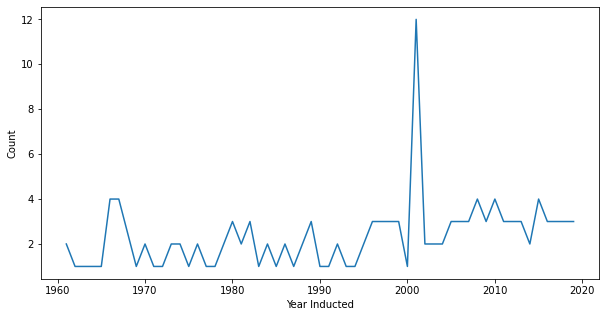

In [149]:
#2001 has 12 inductees
fig, ax = plt.subplots(figsize=(10,5))
line = sns.lineplot(data=ind_per_year, x='Year Inducted', y='Count')